In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [34]:
df = pd.read_csv('./table1.csv')
df.head()

,ID,x,y,sy,sx,rhoxy,Unnamed: 6
0,1,201,592,61,9,-0.84,NaN
1,2,244,401,25,4,0.31,NaN
2,3,47,583,38,11,0.64,NaN
3,4,287,402,15,7,-0.27,NaN
4,5,203,495,21,5,-0.33,NaN


In [35]:
df_ex1 = df.tail(16)

<ErrorbarContainer object of 3 artists>

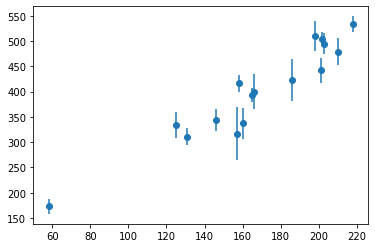

In [36]:
plt.errorbar(df_ex1.x, df_ex1.y, df_ex1.sy,
             ls='', marker='o')

We want to minimize $$\sum (f(x_i)-y_i)^2/\sigma_i^2$$
For the model
$$f(x) = mx + b$$

In [37]:
def f(x, m, b):
    return m * x + b

In [38]:
xdata = df_ex1.x.values
ydata = df_ex1.y.values
sigmay = df_ex1.sy.values

In [46]:
p, cov = curve_fit(
    f,
    xdata,
    ydata,
    p0=[1, 0],
    sigma=sigmay)
std = np.sqrt(np.diag(cov))

Text(58, 479.7, '(2.24 +/- 0.12) * x + (34.05 +/- 21.08)')

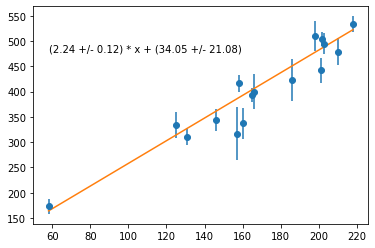

In [47]:
plt.errorbar(df_ex1.x, df_ex1.y, df_ex1.sy,
             ls='', marker='o')
x = np.linspace(xdata.min(), xdata.max(), 1000)
plt.plot(x, f(x, p[0], p[1]))
s = "(%1.2f +/- %1.2f) * x + (%1.2f +/- %1.2f)" % (p[0], std[0], p[1], std[1])
plt.text(xdata.min(), ydata.max()*0.9, s)

# Check with a different package

In [53]:
from lmfit.models import LinearModel

In [54]:
model = LinearModel()

In [70]:
out = model.fit(df_ex1.y.values, x=df_ex1.x.values, weights=1/sigmay)

In [75]:
out

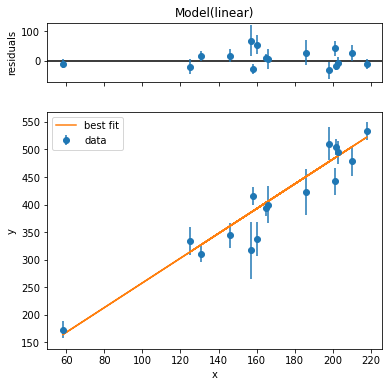

In [74]:
out.plot();

In [ ]:
out